In [1]:
#! pip install librosa


In [5]:
import os
import zipfile
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

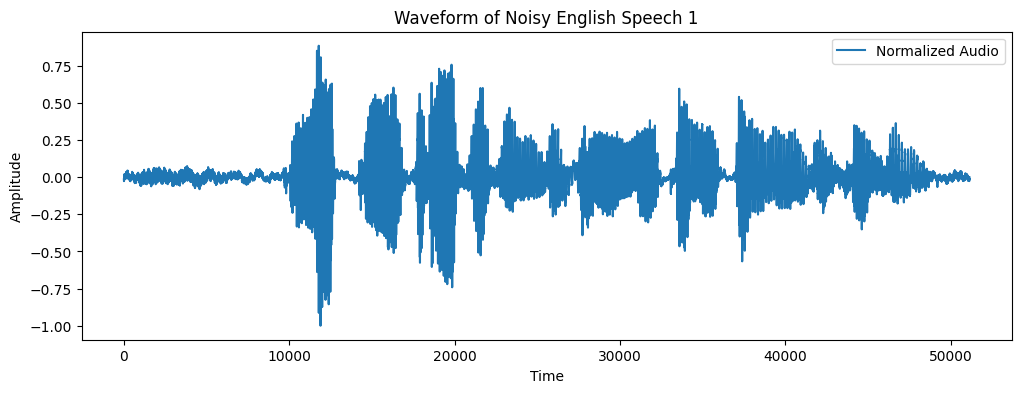

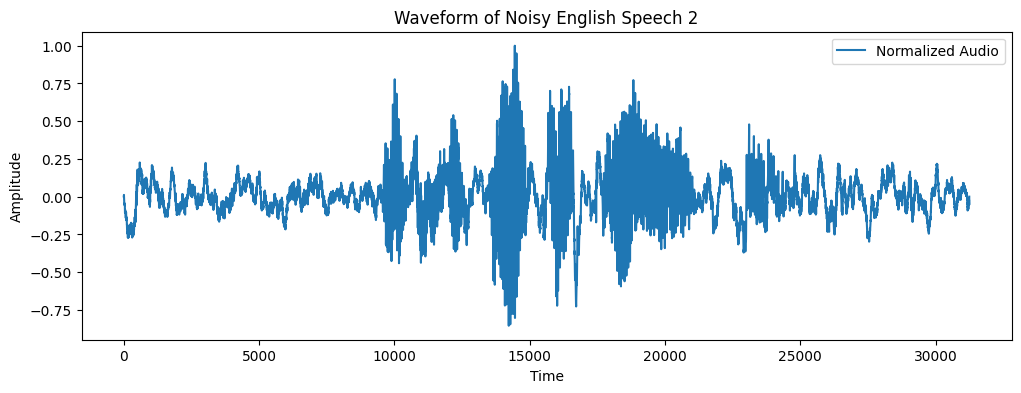

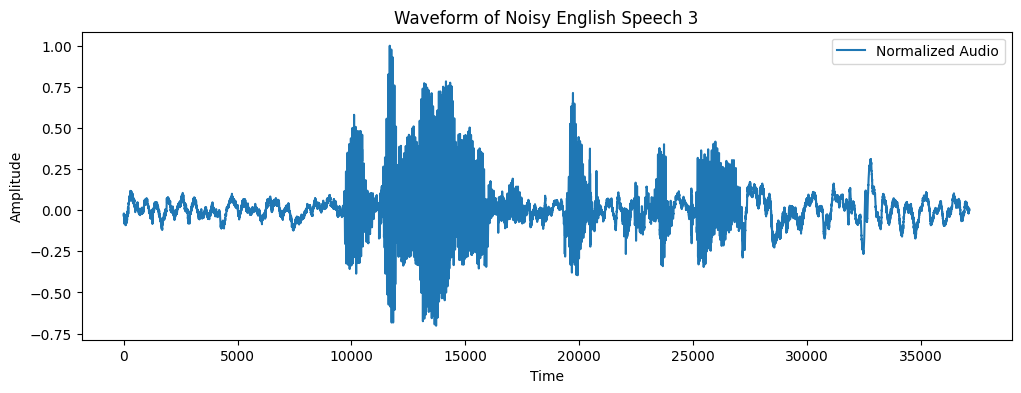

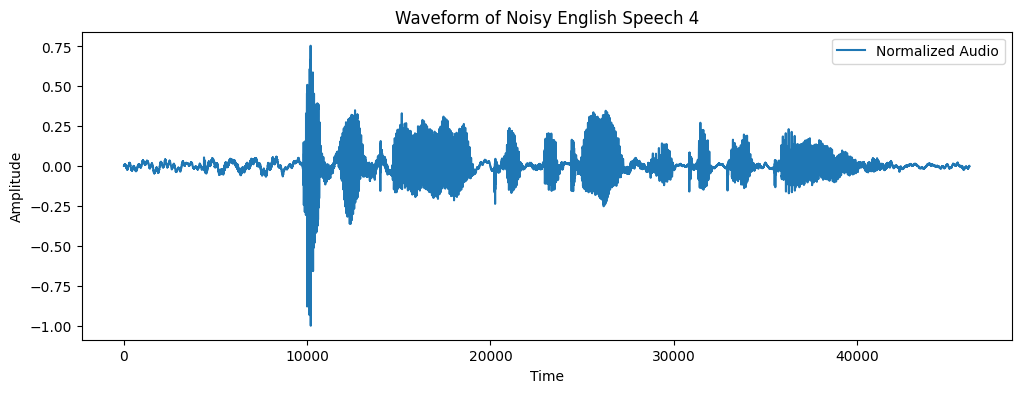

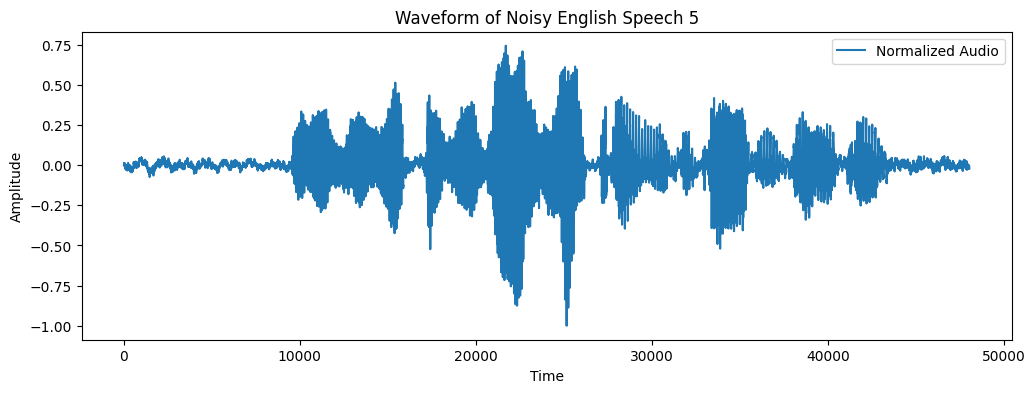

Preprocessed 5 noisy English files successfully and stored in /home/m23csa017/nest/assn1/data/english_noise_audios!


In [6]:
# Path to English dataset ZIP
zip_path = "/home/m23csa017/nest/assn1/data/english_noisy_testset_wav.zip"
extract_path = "/home/m23csa017/nest/assn1/data/english_noisy_testset_wav"
processed_path = "/home/m23csa017/nest/assn1/data/english_noise_audios"  # New save location

# Check if already extracted; if not, extract
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Ensure the processed directory exists
os.makedirs(processed_path, exist_ok=True)

# List and select first 5 .wav files
english_files = [f for f in os.listdir(extract_path) if f.endswith('.wav')][:5]

# Process each file
for i, file in enumerate(english_files):
    file_path = os.path.join(extract_path, file)
    
    # Load audio file
    noisy_audio, sr = librosa.load(file_path, sr=16000, mono=True)

    # Normalize audio
    noisy_audio = noisy_audio / max(abs(noisy_audio))

    # Save preprocessed file in the new directory
    output_filename = os.path.join(processed_path, f"english_noisy_processed_{i+1}.wav")
    sf.write(output_filename, noisy_audio, sr)
    
    # Plot waveform
    plt.figure(figsize=(12, 4))
    plt.plot(noisy_audio, label="Normalized Audio")
    plt.title(f"Waveform of Noisy English Speech {i+1}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

print(f"Preprocessed {len(english_files)} noisy English files successfully and stored in {processed_path}!")


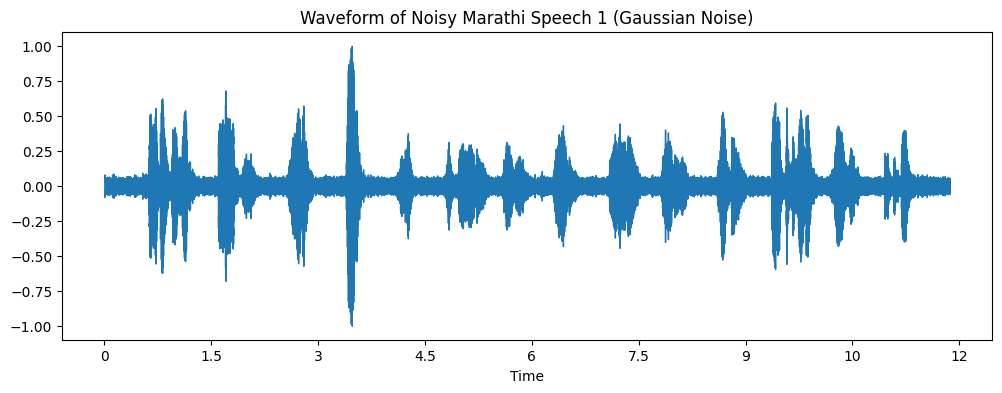

Processed mar_0938.wav with Gaussian Noise


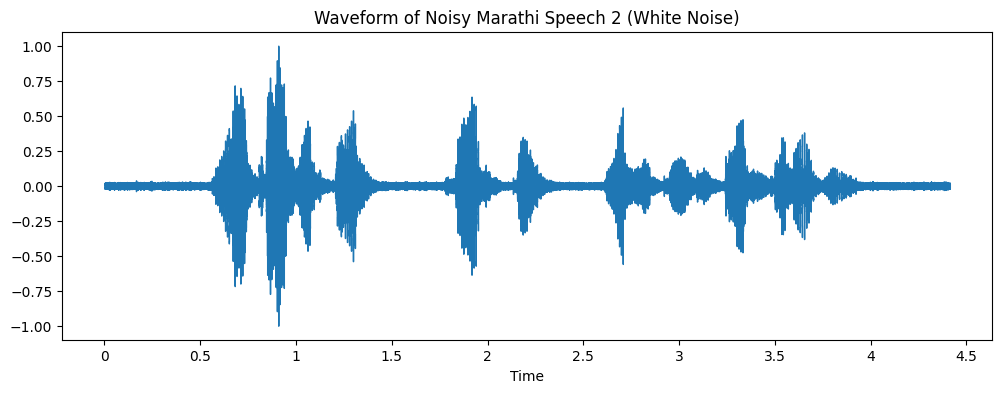

Processed mar_0655.wav with White Noise


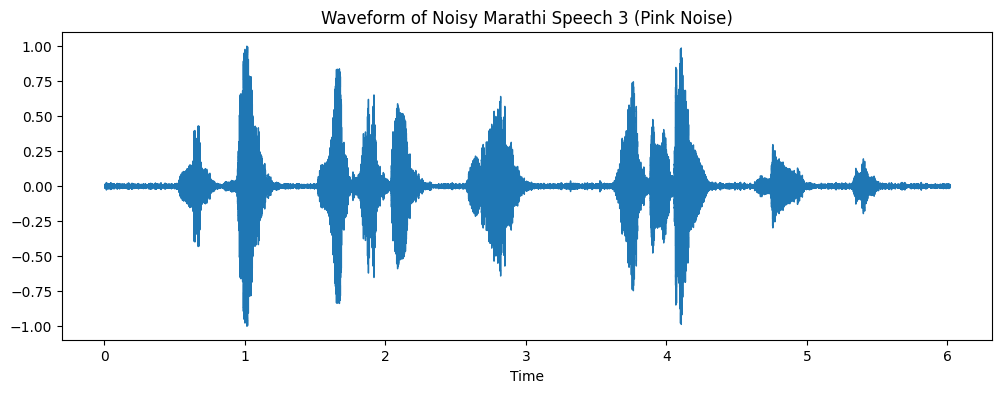

Processed mar_0088.wav with Pink Noise


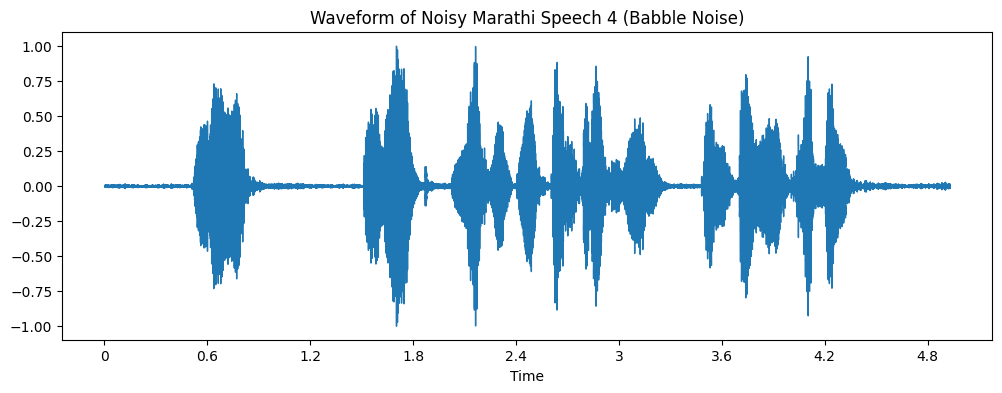

Processed mar_0075.wav with Babble Noise


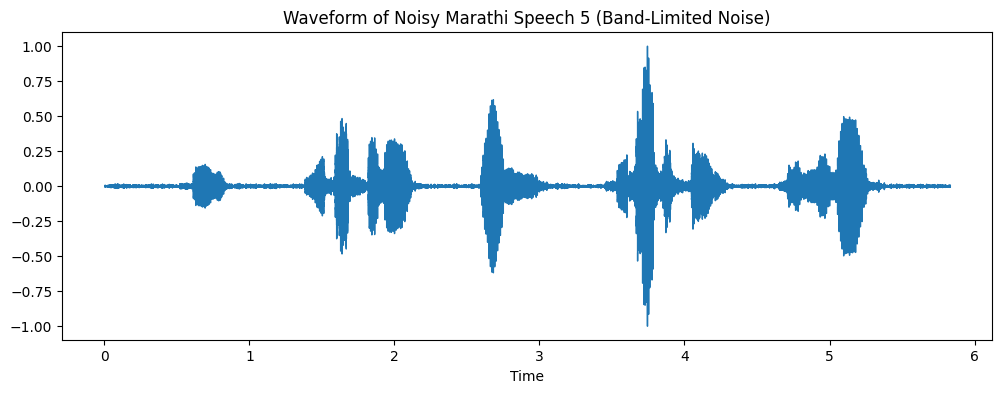

Processed mar_0083.wav with Band-Limited Noise
Preprocessed 5 noisy Marathi files successfully and saved in /home/m23csa017/nest/assn1/data/marathi_noise_audios!


In [7]:
marathi_path = "/home/m23csa017/nest/assn1/data/Marathi"
marathi_output_path = "/home/m23csa017/nest/assn1/data/marathi_noise_audios"

os.makedirs(marathi_output_path, exist_ok=True)

# List and select first 5 .wav files
marathi_files = [f for f in os.listdir(marathi_path) if f.endswith('.wav')][:5]

# Function to generate pink noise
def pink_noise(length):
    uneven = length % 2
    X = np.random.randn(length // 2 + 1 + uneven) + 1j * np.random.randn(length // 2 + 1 + uneven)
    S = np.sqrt(np.arange(len(X)) + 1.)  # Power law (1/f)
    y = (np.fft.irfft(X / S)).real
    if uneven:
        y = y[:-1]
    return y / max(abs(y))

# Function to generate babble noise (simulated using multiple shifted copies of speech)
def babble_noise(clean_audio, sr):
    num_voices = 5
    babble = np.zeros_like(clean_audio)
    for _ in range(num_voices):
        shift = np.random.randint(0, len(clean_audio) // 10)
        babble += np.roll(clean_audio, shift)
    babble /= max(abs(babble))  # Normalize
    return babble

# Process each file with different noise types
noise_types = ["Gaussian Noise", "White Noise", "Pink Noise", "Babble Noise", "Band-Limited Noise"]

for i, file in enumerate(marathi_files):
    file_path = os.path.join(marathi_path, file)

    # Load clean audio
    clean_audio, sr = librosa.load(file_path, sr=16000, mono=True)

    # Normalize audio
    clean_audio = clean_audio / max(abs(clean_audio))

    # Generate noise based on index
    if i == 0:
        noise = np.random.normal(0, 0.02, clean_audio.shape)  # Gaussian Noise
    elif i == 1:
        noise = np.random.uniform(-0.02, 0.02, clean_audio.shape)  # White Noise
    elif i == 2:
        noise = pink_noise(len(clean_audio)) * 0.02  # Pink Noise
    elif i == 3:
        noise = babble_noise(clean_audio, sr) * 0.02  # Babble Noise
    elif i == 4:
        noise = np.random.normal(0, 0.02, clean_audio.shape)  # Base Gaussian noise
        noise_fft = np.fft.rfft(noise)  # Convert to frequency domain
        noise_fft[:100] = 0  # Remove low frequencies
        noise_fft[1000:] = 0  # Remove high frequencies
        noise = np.fft.irfft(noise_fft).real  # Convert back to time domain
        noise = noise / max(abs(noise)) * 0.02  # Band-Limited Noise

    # Add noise to clean audio
    noisy_audio = clean_audio + noise
    noisy_audio = np.clip(noisy_audio, -1, 1)  # Clip values between -1 and 1

    # Save noisy file
    output_filename = os.path.join(marathi_output_path, f"marathi_noisy_synthesized_{i+1}.wav")
    sf.write(output_filename, noisy_audio, sr)

    # Plot waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(noisy_audio, sr=sr)
    plt.title(f"Waveform of Noisy Marathi Speech {i+1} ({noise_types[i]})")
    plt.show()

    print(f"Processed {file} with {noise_types[i]}")

print(f"Preprocessed 5 noisy Marathi files successfully and saved in {marathi_output_path}!")
